<img src="images/Q1.1.png" style="width:100px;height:50px;" align="left">

**1. (a) The matrix form of least squares solution (as given in slide#31 of week 1 slides):<br><br>**

$\textbf{w} = (\textbf{X}^\textbf{T}\textbf{X})^{-1}\textbf{X}^T\textbf{y}$

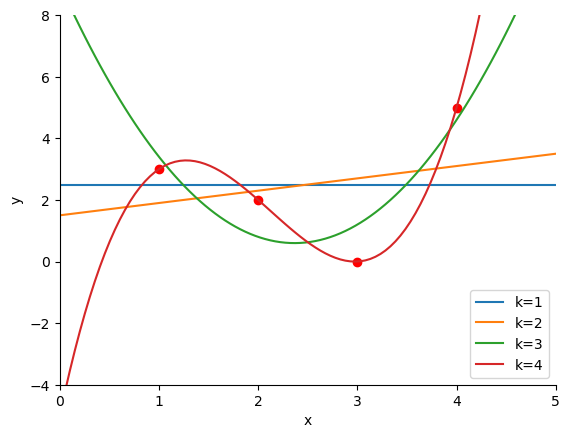

In [557]:
import numpy as np
from matplotlib import pyplot as plt

def build_input_basis_k1_to_k4(x: list) -> list:
    """
    Build the 4 polynomial function input values for the independent variable x, for each of the 4 basis variable from k=1 to k=4.
    :param x: The given independent variable values.
    :return: Four polynomial input values for k=1, k=2, k=3, k=4.
    """
    X_1 = np.ones((len(x), 1)) # k=1 gives x^0, so filled with 1s. This is the bias term (i.e. y-intercept).
    X_2 = np.array(x).reshape(-1, 1) # k=2
    X_2 = np.column_stack((X_1, X_2))
    X_3 = np.array([x_**2 for x_ in x]).reshape(-1, 1) # k=3
    X_3 = np.column_stack((X_2, X_3))
    X_4 = np.array([x_**3 for x_ in x]).reshape(-1, 1) # k=4
    X_4 = np.column_stack((X_3, X_4))
    return [X_1, X_2, X_3, X_4]

def compute_weights_of_lr_by_least_squares(X: list, y) -> list:
    """
    Calculate coefficients of linear regression using least squares of given data set.
    :param X: Independent variable datasets. List of NumPy arrays.
    :param y: Dependent variable values. NumPy array.
    :return: Coefficients (aka weights).
    """
    weights = []
    for X_ in X:
        X_t = X_.T
        w = np.linalg.inv(X_t @ X_) @ X_t @ y
        weights.append(w.flatten())
    return weights

def predict_with_polynomial_func(w: list, x_for_pred) -> list:
    """
    Calculate the predicted values of y using the polynomial for each of the 4 bases.
    :param w: Weights calculated for all 4 bases.
    :param x_for_pred: Independent variable values to use for predicting dependent variable values. NumPy array.
    :return: Predicted y values for all 4 bases.
    """
    y_preds = []
    for w_ in w:
        # NumPy's poly1d() expects x^n + .. + x^1 + x^0, so I need to reverse the order of w_T
        w_T_for_np = np.flip(w_.T).flatten()
        # Evaluate polynomial for a range of x values within limits of plot shown in Figure 1
        # (i.e. from x = 0 to about x=5)
        y_pred = np.poly1d(w_T_for_np)(x_for_pred)
        y_preds.append(y_pred)
    return y_preds

def plot_polynomials_k1_k2_k3_k4(x, y, y_preds: list, x_for_plot) -> None:
    """
    :param x: The independent variable (input), NumPy array.
    :param y: The dependent variable (aka label), NumPy array.
    :param y_preds: Predicted values of y for each of the four k values, NumPy array.
    """
    _ , ax = plt.subplots(facecolor='white')
    ax.set_xlim(0, 5)
    ax.set_ylim(-4, 8)
    ax.scatter(x, y, color='red')
    for y_pred, k in zip(y_preds, [1,2,3,4]):
        ax.plot(x_for_plot, y_pred, label=f'k={k}')
    plt.xlabel('x')
    plt.ylabel('y')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.legend()
    plt.show()

# PYTHON FUNCTIONS RUN FROM HERE:
# The (x, y) values are: (1, 3), (2, 2), (3, 0), (4, 5),
dataset_x, dataset_y = [1, 2, 3, 4], [3, 2, 0, 5]
X_k1_k2_k3_k4 = build_input_basis_k1_to_k4(dataset_x)
y = np.array([3, 2, 0, 5]).reshape(-1, 1)
weights_k1_k2_k3_k4 = compute_weights_of_lr_by_least_squares(X_k1_k2_k3_k4, y)
x_for_pred_and_plot = np.linspace(0, 5, 100)
y_preds = predict_with_polynomial_func(weights_k1_k2_k3_k4, x_for_pred = x_for_pred_and_plot)
plot_polynomials_k1_k2_k3_k4(x=dataset_x, y=dataset_y, y_preds=y_preds, x_for_plot=x_for_pred_and_plot)

**1. (b) `Weights` variable from part (a):**

In [558]:
print(f'k1_x0 = {float(weights_k1_k2_k3_k4[0][0])}')
print(f'k2_x0 = {float(weights_k1_k2_k3_k4[1][0])}, k2_x1 = {float(weights_k1_k2_k3_k4[1][1])}')
print(f'k3_x0 = {float(weights_k1_k2_k3_k4[2][0])}, k3_x1 = {float(weights_k1_k2_k3_k4[2][1])}, k3_x1 = {float(weights_k1_k2_k3_k4[2][2])}')

k1_x0 = 2.5
k2_x0 = 1.5, k2_x1 = 0.40000000000000036
k3_x0 = 8.999999999999694, k3_x1 = -7.099999999999758, k3_x1 = 1.499999999999956


**Hence, the equations are:**<br>
for $k=1$: $y = 2.5$, <br>
for $k=2$: $y = 1.5 + 0.4x$ for $k=2$, <br>
for $k=3$: $y = 9 - 7.1x + 1.5x^2$.

**1. (c) (From slide#27 in week 1 slides): In matrix notation, the empirical mean square error (MSE) of the linear predictor** $\hat{y}=\textbf{w}.\textbf{x}$ **on a data sequence** $\textit{S}$ **is**:<br>
$\frac{1}{m}(X\textbf{w} - \textbf{y})^\intercal X\textbf{w} - \textbf{y}$ <br>

There are 4 data samples, so $m = 4$


In [582]:
def calculate_MSE(m, X, w, y):
    MSEs = []
    for i in range(len(X)):
        MSEs.append((1 / m) * (X[i] @ w[i] - y).T @ (X[i] @ w[i] - y))
    return MSEs

MSEs = calculate_MSE(m=len(dataset_x),X=X_k1_k2_k3_k4, w=weights_k1_k2_k3_k4, y=dataset_y)
for i, MSE in zip([0, 1, 2, 3], MSEs):
    print(f'k={i + 1} MSE = {MSE}')

k=1 MSE = 3.25
k=2 MSE = 3.05
k=3 MSE = 0.800000000000001
k=4 MSE = 3.4942940895563015e-23


<img src="images/Q1.2a.png" style="width:100px;height:50px;" align="left"> <br><br>

**1.2.(a)** $g_{\sigma}(x) := \sin^2{(2 \pi x)} + \epsilon$

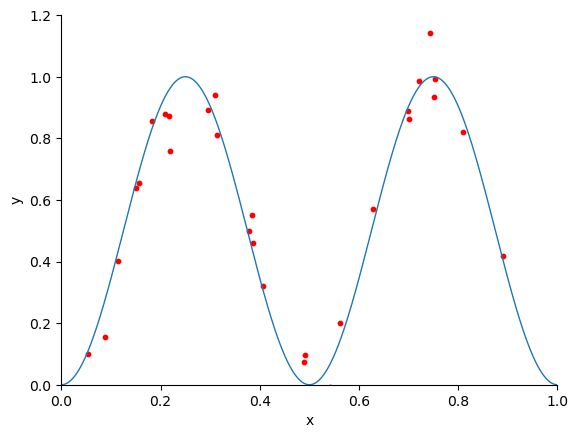

In [583]:
def sin_sqrd_2pi_x(x: float) -> float:
    """
    Apply sine(2*pi*x)^2 to given input number.
    :param x: Input number
    :return: Output number, a function of input.
    """
    return np.square(np.sin(2 * np.pi * x))

def g_0p07(x: float) -> float:
    """
    Apply sine(2*pi*x)^2 with random normally-distributed noise to given input number, using standard deviation of 0.07.
    :param x: Input number.
    :return: Output number, a function of input.
    """
    mean, std_dev, num_of_samples = 0, 0.07, 1
    epsilon = np.random.normal(loc=mean, scale=std_dev, size=num_of_samples)
    epsilon = float(epsilon[0])
    return sin_sqrd_2pi_x(x) + epsilon

def generate_dataset_about_g() -> tuple:
    """
    Generate dataset of 30 independent variables sampled uniformly from interval [0, 1] and corresponding dependent variables
    :return: Dataset S.
    """
    x = np.random.uniform(0, 1, 30)
    y = [g_0p07(x_) for x_ in x]
    return x, y

def plot_g_0p07_and_sin_sqrd_2pi_x(x, y_d, y):
    _ , ax = plt.subplots()
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1.2)
    ax.scatter(x, y_d, color='red', s=10)
    ax.plot(x_for_plot, y, linewidth=1)
    plt.xlabel('x')
    plt.ylabel('y')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()

g_dataset_x, g_dataset_y = generate_dataset_about_g()
x_for_plot = np.linspace(0, 1, 1000)
y = [sin_sqrd_2pi_x(x_) for x_ in x_for_plot]
plot_g_0p07_and_sin_sqrd_2pi_x(g_dataset_x, g_dataset_y, y)

<img src="images/Q1.2ai.png" style="width:100px;height:50px;" align="left"><br>
<img src="images/Q1.2ai_plot.png" style="width:100px;height:50px;" align="left">

<img src="images/Q1.2aii.png" style="width:100px;height:50px;" align="left">

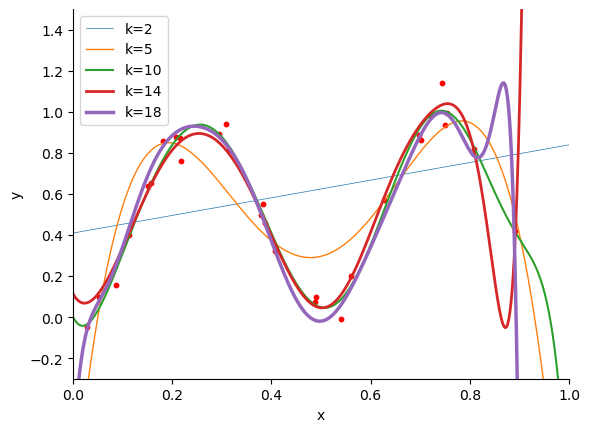

In [584]:
def build_polynomial_basis_k_18(input_x: list) -> list:
    """
    Build polynomial function input values for independent variable x, for every basis up to 18.
    (The other 4 basis vectors (k = 2, 5, 10 and 14) are then sliced from this).
    :param input_x: The given independent variable values.
    :return: Four polynomial input values for k=2, k=5, k=10, k=14, k=18.
    """
    X_k_ = np.column_stack((np.ones((len(input_x), 1)), np.array(input_x).reshape(-1, 1)))
    for pow in range(2, 18):
        X_k_ = np.column_stack((X_k_, np.array([x**pow for x in input_x]).reshape(-1, 1)))
    return X_k_

def predict_with_polynomial_func(weights: list, x_for_pred) -> list:
    """
    Calculate the predicted values of y using the polynomial for each of the 4 bases.
    :param weights: Weights calculated for all 4 bases. List of NumPy arrays.
    :param x_for_pred: Independent variables values to use for making predictions of the dependent variable.
    :return: Predicted values for all 4 bases. List of NumPy arrays.
    """
    y_preds = []
    for w in weights:
        # NumPy's poly1d() takes input as: x^n + .. + x^1 + x^0,
        # Hence reversing order of w_T:
        w_T_for_np = np.flip(w.T).flatten()
        # Evaluate polynomial for a range of x values within limits of plot shown in Figure 1 (i.e. from x = 0 to about x=5)
        y_pred = np.poly1d(w_T_for_np)(x_for_pred)
        y_preds.append(y_pred)
    return y_preds

def plot_polynomials_k2_k5_k10_k14_k18(x, y, y_preds, x_for_plot):
    _ , ax = plt.subplots()
    ax.set_xlim(0, 1)
    ax.set_ylim(-0.3, 1.5)
    ax.scatter(x, y, color='red', s=10)
    linewidth=0.5
    for y_pred, k in zip(y_preds, [2,5,10,14,18]):
        ax.plot(x_for_plot, y_pred, label=f'k={k}', linewidth=linewidth)
        linewidth += 0.5

    plt.xlabel('x')
    plt.ylabel('y')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.legend()
    plt.show()

# g_dataset_x, g_dataset_y = generate_dataset_about_g()
X_k18 = build_polynomial_basis_k_18(input_x=g_dataset_x)
weights_k2_k5_k10_k14_k18 = compute_weights_of_lr_by_least_squares([X_k18[:,:2], X_k18[:,:5],
                                                                    X_k18[:,:10],X_k18[:,:14],
                                                                    X_k18], g_dataset_y)
x_for_pred_and_plot = np.linspace(0, 1, 1000)
y_preds = predict_with_polynomial_func(weights_k2_k5_k10_k14_k18, x_for_pred = x_for_pred_and_plot)
plot_polynomials_k2_k5_k10_k14_k18(x=g_dataset_x, y=g_dataset_y, y_preds=y_preds, x_for_plot = x_for_pred_and_plot)

**1. (b) $te_k(S)$ =

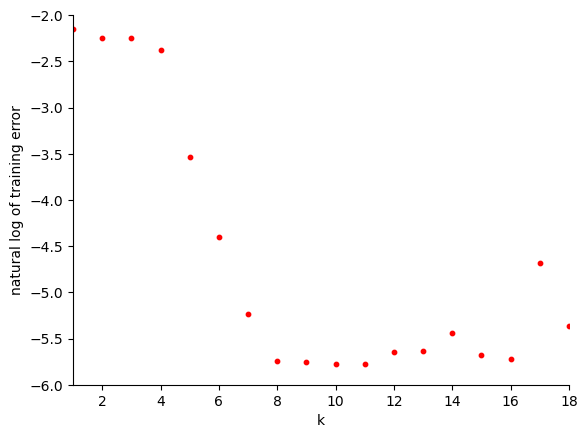

In [603]:
X_k1_to_k18 = [X_k18[:,:i] for i in range(1, 19)]
# fit dataset to polynomials as before by least squares:
weights_k1_to_k18 = compute_weights_of_lr_by_least_squares(X=X_k1_to_k18, y=g_dataset_y)
t_ek = calculate_MSE(m=len(g_dataset_x), X=X_k1_to_k18, w=weights_k1_to_k18, y=g_dataset_y)

def plot_ln_tek_vs_k(k, ln_tek):
    _ , ax = plt.subplots()
    ax.set_xlim(1, 18)
    ax.set_ylim(-6, -2)
    ax.scatter(k, ln_tek, color='red', s=10)
    # ax.plot(k, ln_tek)
    plt.xlabel('k')
    plt.ylabel('natural log of training error')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # plt.legend()
    plt.show()

plot_ln_tek_vs_k(k=list(range(1, 19)), ln_tek=np.log(t_ek))